# Loan Approval Prediction with Logistic Regression

We're going to utilize logistic regression to predict loan approvals based on applicants' financial information.

## Exploration 

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("loan_data.csv")

# View the data
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [2]:
# Statistics
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [3]:
# Check missing values
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

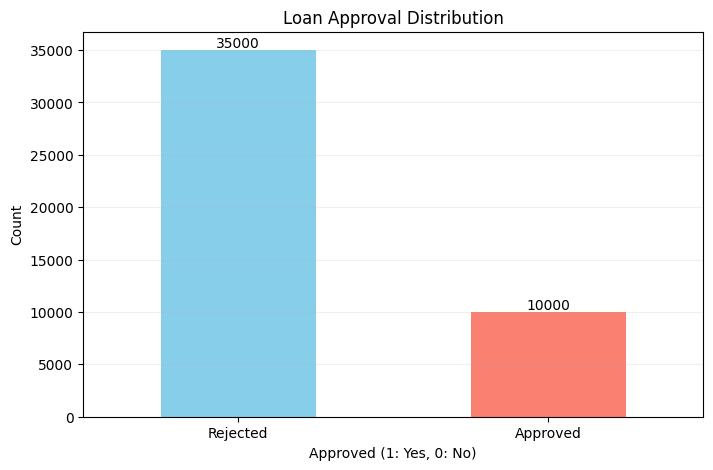

In [4]:
# Target value distribution
plt.figure(figsize=(8,5))
ax = data["loan_status"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Loan Approval Distribution')
plt.xlabel('Approved (1: Yes, 0: No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Approved'], rotation=0)
plt.grid(axis='y', alpha=0.2)
plt.show()

In [5]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='str')

[Text(0, 0, 'Rejected'), Text(1, 0, 'Approved')]

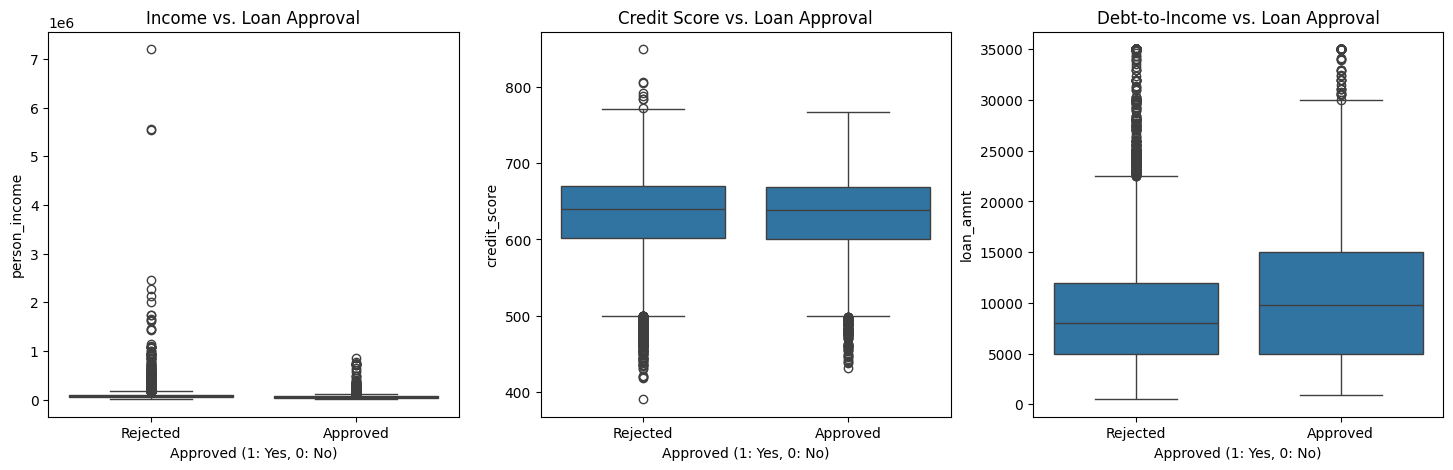

In [6]:
# Explore relationships between features and target

fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Income vs Approval
sns.boxplot(data=data, x='loan_status', y='person_income', ax=axes[0])
axes[0].set_title('Income vs. Loan Approval')
axes[0].set_xlabel('Approved (1: Yes, 0: No)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Rejected', 'Approved'])

# Credit Score vs Approval
sns.boxplot(data=data, x='loan_status', y='credit_score', ax=axes[1])
axes[1].set_title('Credit Score vs. Loan Approval')
axes[1].set_xlabel('Approved (1: Yes, 0: No)')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Rejected', 'Approved'])

sns.boxplot(data=data, x='loan_status', y='loan_amnt', ax=axes[2])
axes[2].set_title('Debt-to-Income vs. Loan Approval')
axes[2].set_xlabel('Approved (1: Yes, 0: No)')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Rejected', 'Approved'])

## Data Preparation and Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [8]:
X = data[['person_income', 'credit_score', 'loan_amnt']]
y = data[['loan_status']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 63)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the model

In [11]:
# Creating the model
model = LogisticRegression(random_state = 63)
model.fit(X_train_scaled, y_train.values.ravel())

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",63
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [21]:
# Print the coefficients
print("Model Coefficients:")
for feature, c in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {c:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Model Coefficients:
person_income: -2.3613
credit_score: 0.0063
loan_amnt: 0.7113
Intercept: -1.6111


In [82]:
# Generate predictions for the test dataset
y_pred = model.predict(X_test_scaled)
y_pred_proba = y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba

array([0.22243201, 0.09776006, 0.25328424, ..., 0.33033026, 0.18673651,
       0.12076033], shape=(9000,))

In [84]:
# Display examples prediction
y_pred[:5]
example = pd.DataFrame({
    'Income': X_test['person_income'].values[:5],
    'Credit Score': X_test['credit_score'].values[:5],
    'Debt-to-Income': X_test['loan_amnt'].values[:5],
    'True Label': y_test.values.reshape(-1)[:5],
    'Predicted': y_pred[:5],
    'Probability': np.round(y_pred_proba[:5], 3)
})
example

,Income,Credit Score,Debt-to-Income,True Label,Predicted,Probability
0,49066.0,638,5000.0,0,0,0.222
1,127050.0,660,15546.0,0,0,0.098
2,79020.0,534,14000.0,0,0,0.253
3,34181.0,720,5000.0,1,0,0.304
4,111369.0,694,35000.0,1,1,0.600


In [56]:
# Trying to predict an example
X = data[['person_income', 'credit_score', 'loan_amnt']]
applicant = {
    'person_income': 75000,
    'credit_score': 720,
    'loan_amnt': 0.25
}

applicant_scaled = scaler.transform(new_applicant)
model.predict(applicant_scaled), model.predict_proba(new_applicant_scaled)

/home/theo/.local/share/virtualenvs/loan_approval-PQAedE79/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([0]), array([[0.92573517, 0.07426483]]))

## Model evaluation

In [67]:
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, roc_curve,
                            roc_auc_score, precision_score,
                            recall_score, f1_score)
from sklearn.metrics import ConfusionMatrixDisplay

In [68]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Model Accuracy: 0.7933 (79.33%)


In [69]:
# Classification report
print("Classification report: ")
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      7039
           1       0.66      0.11      0.18      1961

    accuracy                           0.79      9000
   macro avg       0.73      0.55      0.53      9000
weighted avg       0.77      0.79      0.73      9000



<Figure size 800x600 with 0 Axes>

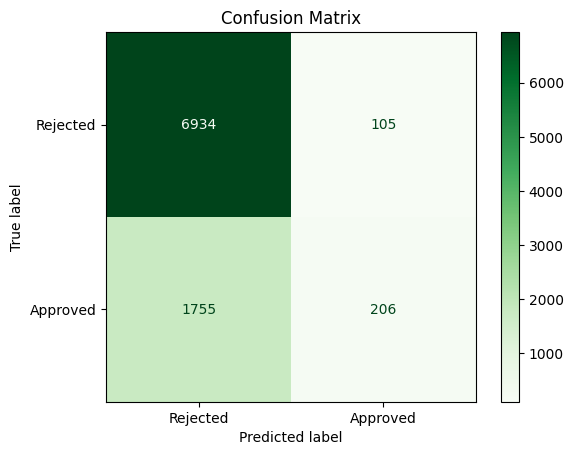

In [74]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Rejected', 'Approved']
)

plt.figure(figsize=(8, 6))
cmd.plot(cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

In [75]:
# Explain the confusion matrix components
tn, fp, fn, tp = cm.ravel()
print("\nConfusion Matrix Components:")
print(f"True Positives (TP): {tp} - Correctly predicted as approved")
print(f"True Negatives (TN): {tn} - Correctly predicted as rejected")
print(f"False Positives (FP): {fp} - Incorrectly predicted as approved (Type I error)")
print(f"False Negatives (FN): {fn} - Incorrectly predicted as rejected (Type II error)")


Confusion Matrix Components:
True Positives (TP): 206 - Correctly predicted as approved
True Negatives (TN): 6934 - Correctly predicted as rejected
False Positives (FP): 105 - Incorrectly predicted as approved (Type I error)
False Negatives (FN): 1755 - Incorrectly predicted as rejected (Type II error)


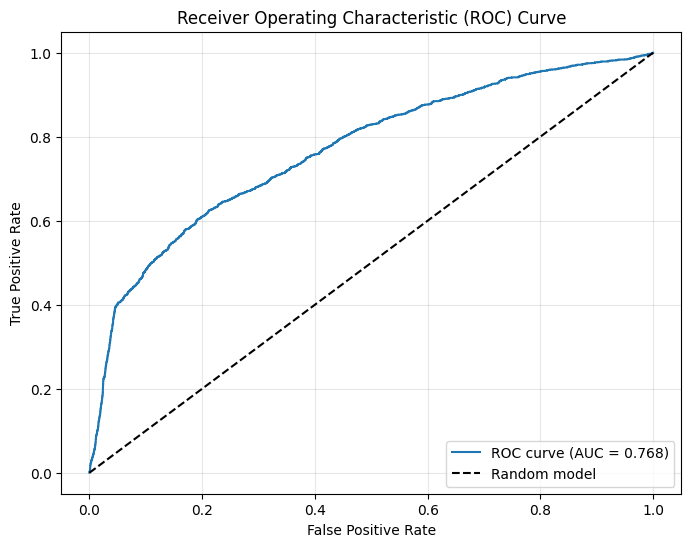

In [86]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

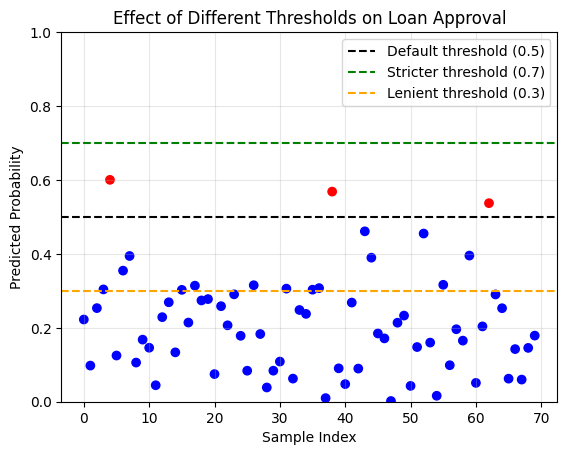

In [92]:
# Create a sample of probabilities
proba_subset = y_pred_proba[:70]
indices = range(len(proba_subset))

# Plot the probabilities
plt.scatter(indices, proba_subset, c=['red' if p > 0.5 else 'blue' for p in proba_subset])
plt.axhline(y=0.5, color='k', linestyle='--', label='Default threshold (0.5)')
plt.axhline(y=0.7, color='g', linestyle='--', label='Stricter threshold (0.7)')
plt.axhline(y=0.3, color='orange', linestyle='--', label='Lenient threshold (0.3)')

plt.ylim(0, 1)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Effect of Different Thresholds on Loan Approval')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()